In [2]:
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt

In [3]:
x=[]
for i in range(100):
    x.append(np.random.randint(0,700,2)) #generates random 2 element array with values between 0 and 700
x

[array([685, 564]),
 array([ 37, 442]),
 array([676,  38]),
 array([471, 371]),
 array([452, 649]),
 array([657, 145]),
 array([541,  10]),
 array([383, 475]),
 array([222, 588]),
 array([237, 238]),
 array([603, 440]),
 array([ 44, 421]),
 array([610, 154]),
 array([474, 224]),
 array([695, 115]),
 array([502, 214]),
 array([320, 379]),
 array([448, 464]),
 array([462, 682]),
 array([664, 575]),
 array([ 19, 429]),
 array([422, 471]),
 array([ 27, 563]),
 array([163, 116]),
 array([588, 309]),
 array([230, 676]),
 array([572, 284]),
 array([391, 610]),
 array([  2, 375]),
 array([454, 175]),
 array([356, 436]),
 array([140, 596]),
 array([201,  53]),
 array([349, 258]),
 array([236, 312]),
 array([ 77, 345]),
 array([581, 634]),
 array([133, 575]),
 array([381, 658]),
 array([211, 387]),
 array([243,  30]),
 array([438, 604]),
 array([301, 304]),
 array([121, 440]),
 array([456,   1]),
 array([449, 425]),
 array([108, 294]),
 array([287, 351]),
 array([388, 185]),
 array([676, 522]),


In [4]:
x_np=np.asarray(x)

In [5]:
x_np[:,0]

array([685,  37, 676, 471, 452, 657, 541, 383, 222, 237, 603,  44, 610,
       474, 695, 502, 320, 448, 462, 664,  19, 422,  27, 163, 588, 230,
       572, 391,   2, 454, 356, 140, 201, 349, 236,  77, 581, 133, 381,
       211, 243, 438, 301, 121, 456, 449, 108, 287, 388, 676, 363, 100,
       553, 593, 235, 163, 537, 684,   0, 557, 377, 262,  29, 201, 121,
       500, 169, 123, 195,  84, 130, 288, 538, 369, 621, 389, 554, 534,
       382, 198, 535, 285, 425, 383,  29, 521, 317, 662, 507, 253, 608,
       666, 373, 363, 297, 433, 193, 135, 328,  83])

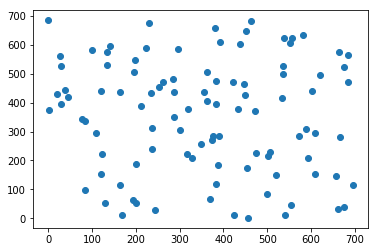

In [6]:
plt.scatter(x_np[:,0],x_np[:,1])

### K means

In [7]:
def distance(x,y):
    return(np.linalg.norm(x-y))

In [8]:
def initial_seeds_selection(x,k):
    seeds=[]
    max_dis=0
    seeds.append(rn.choice(x))
    for i in range(k-1):
        for j in range(len(x)):
            dis=distance(seeds[len(seeds)-1],x[j])
            if(dis>max_dis):
                max_dis=dis
                pt=x[j]
        seeds.append(pt)
    return(seeds)

In [9]:
seeds=initial_seeds_selection(x,3)

In [10]:
seeds

[array([195, 505]), array([676,  38]), array([  0, 685])]

In [ ]:
def kmeans(x,k,maxiter):
    a=[] #the centroid array
    dm=np.zeros((k,len(x)))#initialize distance matrix
    a = initial_seeds_selection(x,k)  #to select k random data points as initial seeds
    for itervar in range(maxiter):
        cls=[] #cluster array
        for i in range(k):
            cls.append([]) #initialize cluster array of k arrays
        for i in range(len(a)):
            for j in range(len(x)):
                    dm[i][j]=distance(a[i],x[j]) #distance matrix generation
        for i in range(len(dm)):
            for j in range(len(x)):
                if((min(dm[:,j:j+1])==dm[i][j])):
                    cls[i].append(x[j]) #appending minimum distance data point to corresponding cluster  
        for i in range(k):
            a[i]=np.array(cls[i]).mean(axis=0) #assign corresponding meanpoint as the new centroid
    return(cls)